<a href="https://colab.research.google.com/github/santoshmn26/Intro-to-Machine-Learning/blob/master/Intro-to-Machine-Learning/Linear_regression/Muliple_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns 

In [0]:
files.upload()

In [0]:
data = pd.read_csv("/content/50_Startups.csv")

***So, here our***

***Dependent var: Profit***

***Independent var / Feature var : [0:4]***

In [11]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


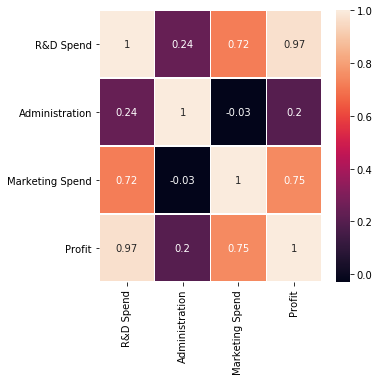

In [12]:
corr_matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(data = corr_matrix, annot = True, linewidths = .5, ax = ax)

***Data Prep***



1.   x: 2D matrix with columns [0:3]
2.   y: 1D matrix with profit column



In [0]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

***Dependent variable 2D Matrix and independent variable 1D matrix***

In [14]:
print(x.shape,y.shape)

(50, 4) (50,)


In [15]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

***Note x has a column 'State' which is a categorical data***
***We cannot use a categorical data as a feature variable we need to convert this into a numerical data***

In [16]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


***Convert the categorical data into numerical data with LabelEncoder***

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x.iloc[:,3] = labelencoder.fit_transform(x.iloc[:, 3])

***Prepare Test Train Split***

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state = 0)

In [0]:
regressor = LinearRegression()

***Fit the model with training data***

In [29]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

***Predict the profit for test data***

In [0]:
res = regressor.predict(x_test)

***Plot graphs to compare predected and actual results***


*   Red: Actual result
*   Green: Pred result

The closer the dots are the more accurate the predection



(17,)

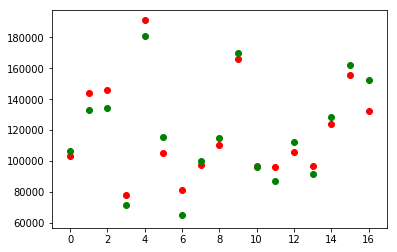

In [52]:
plt.scatter(range(0,17),y_test,color = 'red')
plt.scatter(range(0,17),res,color='green')
y_test.shape